<a href="https://colab.research.google.com/github/LyIron23/MidBootcamp-Project/blob/main/Midbootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/Online_Shopping_Behavior_Cleaned - Copy of Online_Shopping_Behavior_Survey2023-10-31_05_08_04.csv")

In [ ]:
df.head()

,Unnamed: 0,Gender,Age,Status,Children,Employment_Status,Annual_net_income,Internet_hours,Platforms,Influencers_follow,Influencer_purchase,Influence_factors,Online_purchase_preference,Monthly_expense,Purchase_frequency_year,Online_Influenced_purchase,Buying_target,Buying_sale_days
0,1,Female,34-50,Married,Yes,Employed full time,"50,000-80,000",3-4,Facebook,No,Yes,Price (Promotions),Yes,50-150,12,50-75%,Myself and family,Yes
1,2,Female,18-26,Single,No,Employed part time,"30,000-50,000",3-4,"Instagram, TikTok, Youtube,",Yes,No,Price (Promotions),Yes,1-50,6,1-25 %,Myself,No
2,3,Female,34-50,Married,Yes,Employed part time,"50,000-80,000",5-6,Facebook,Yes,No,All of the above,Yes,50-150,2,25-50%,Myself and family,Yes
3,4,Female,18-26,Single,No,Student,"0-13,000",7-8,All of the above,Yes,No,All of the above,No,1-50,4,1-25 %,Myself,Yes
4,5,Male,27-34,In a relationship,No,Employed full time,"50,000-80,000",3-4,Youtube,No,No,Price (Promotions),Yes,50-150,12,25-50%,Myself,Yes


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.dtypes

Gender                        object
Age                           object
Status                        object
Children                      object
Employment_Status             object
Annual_net_income             object
Internet_hours                object
Platforms                     object
Influencers_follow            object
Influencer_purchase           object
Influence_factors             object
Online_purchase_preference    object
Monthly_expense               object
Purchase_frequency_year        int64
Online_Influenced_purchase    object
Buying_target                 object
Buying_sale_days              object
dtype: object

In [ ]:
df['Annual_net_income_mean']=df['Annual_net_income']
df['Annual_net_income_mean']=df['Annual_net_income_mean'].replace(('0-13,000','13,000-30,000','30,000-50,000','50,000-80,000','80,000-100,000'),('6500','21500','40000','65000','90000'))
df['Annual_net_income_mean'] = df['Annual_net_income_mean'].astype(int)

In [ ]:
df['Internet_hours_mean']=df['Internet_hours']
df['Internet_hours_mean']=df['Internet_hours_mean'].replace(('0-1','1-2','3-4','5-6','7-8'),('0.5','1.5','3.5','5.5','7.5'))
df['Internet_hours_mean'] = df['Internet_hours_mean'].astype(float)

In [ ]:
df['Age_mean']=df['Age']
df['Age_mean']=df['Age_mean'].replace(('18-26','27-34','34-50'),('22','30.5','42'))
df['Age_mean'] = df['Age_mean'].astype(float)

In [ ]:
df['Monthly_expense_mean']=df['Monthly_expense']
df['Monthly_expense_mean']=df['Monthly_expense_mean'].replace(('1-50','50-150','150-350'),('25','100','250'))
df['Monthly_expense_mean'] = df['Monthly_expense_mean'].astype(int)

In [ ]:
df['Online_Influenced_purchase_mean']=df['Online_Influenced_purchase']
df['Online_Influenced_purchase_mean']=df['Online_Influenced_purchase_mean'].replace(('0 %','1-25 %','25-50%','50-75%'),('0','13','37.5','62.5'))
df['Online_Influenced_purchase_mean'] = df['Online_Influenced_purchase_mean'].astype(float)

In [ ]:
df.head()

,Gender,Age,Status,Children,Employment_Status,Annual_net_income,Internet_hours,Platforms,Influencers_follow,Influencer_purchase,...,Monthly_expense,Purchase_frequency_year,Online_Influenced_purchase,Buying_target,Buying_sale_days,Annual_net_income_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean
0,Female,34-50,Married,Yes,Employed full time,"50,000-80,000",3-4,Facebook,No,Yes,...,50-150,12,50-75%,Myself and family,Yes,65000,3.5,42.0,100,62.5
1,Female,18-26,Single,No,Employed part time,"30,000-50,000",3-4,"Instagram, TikTok, Youtube,",Yes,No,...,1-50,6,1-25 %,Myself,No,40000,3.5,22.0,25,13.0
2,Female,34-50,Married,Yes,Employed part time,"50,000-80,000",5-6,Facebook,Yes,No,...,50-150,2,25-50%,Myself and family,Yes,65000,5.5,42.0,100,37.5
3,Female,18-26,Single,No,Student,"0-13,000",7-8,All of the above,Yes,No,...,1-50,4,1-25 %,Myself,Yes,6500,7.5,22.0,25,13.0
4,Male,27-34,In a relationship,No,Employed full time,"50,000-80,000",3-4,Youtube,No,No,...,50-150,12,25-50%,Myself,Yes,65000,3.5,30.5,100,37.5


In [ ]:
df['Average_ticket'] = (df['Monthly_expense_mean']*12)/df['Purchase_frequency_year']

In [ ]:
df

,Gender,Age,Status,Children,Employment_Status,Annual_net_income,Internet_hours,Platforms,Influencers_follow,Influencer_purchase,...,Purchase_frequency_year,Online_Influenced_purchase,Buying_target,Buying_sale_days,Annual_net_income_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean,Average_ticket
0,Female,34-50,Married,Yes,Employed full time,"50,000-80,000",3-4,Facebook,No,Yes,...,12,50-75%,Myself and family,Yes,65000,3.5,42.0,100,62.5,100.0
1,Female,18-26,Single,No,Employed part time,"30,000-50,000",3-4,"Instagram, TikTok, Youtube,",Yes,No,...,6,1-25 %,Myself,No,40000,3.5,22.0,25,13.0,50.0
2,Female,34-50,Married,Yes,Employed part time,"50,000-80,000",5-6,Facebook,Yes,No,...,2,25-50%,Myself and family,Yes,65000,5.5,42.0,100,37.5,600.0
3,Female,18-26,Single,No,Student,"0-13,000",7-8,All of the above,Yes,No,...,4,1-25 %,Myself,Yes,6500,7.5,22.0,25,13.0,75.0
4,Male,27-34,In a relationship,No,Employed full time,"50,000-80,000",3-4,Youtube,No,No,...,12,25-50%,Myself,Yes,65000,3.5,30.5,100,37.5,100.0
5,Male,27-34,Married,Yes,Employed full time,"80,000-100,000",1-2,Instagram,Yes,Yes,...,12,25-50%,Myself and family,No,90000,1.5,30.5,25,37.5,25.0
6,Female,18-26,In a relationship,No,Student,"0-13,000",3-4,Twitter,No,Yes,...,2,1-25 %,Myself,Yes,6500,3.5,22.0,25,13.0,150.0
7,Female,27-34,In a relationship,Yes,Self-employed,"13,000-30,000",3-4,Facebook,No,Yes,...,24,50-75%,Myself and family,Yes,21500,3.5,30.5,250,62.5,125.0
8,Male,34-50,In a relationship,Yes,Employed part time,"50,000-80,000",1-2,"Instagram, TikTok, Youtube,",Yes,No,...,4,25-50%,Myself,Yes,65000,1.5,42.0,25,37.5,75.0
9,Female,27-34,Married,Yes,Homemaker,"50,000-80,000",5-6,Facebook,Yes,Yes,...,24,50-75%,Myself,No,65000,5.5,30.5,100,62.5,50.0


In [ ]:
df.dtypes


Gender                              object
Age                                 object
Status                              object
Children                            object
Employment_Status                   object
Annual_net_income                   object
Internet_hours                      object
Platforms                           object
Influencers_follow                  object
Influencer_purchase                 object
Influence_factors                   object
Online_purchase_preference          object
Monthly_expense                     object
Purchase_frequency_year              int64
Online_Influenced_purchase          object
Buying_target                       object
Buying_sale_days                    object
Annual_net_income_mean               int64
Internet_hours_mean                float64
Age_mean                           float64
Monthly_expense_mean                 int64
Online_Influenced_purchase_mean    float64
Average_ticket                     float64
dtype: obje

 **Statistical hypothesis testing**

**Hypothesis nº1**

H0: Avg monthly spending of people that pass 5h/day online <= Avg monthly spending of people that pass less than 5h/day online

H1: Avg monthly spending of people that pass 5h/day online > Avg monthly spending of people that pass less than 5h/day online

H0: \mu_5h+ <= \mu_5h-

H1: \mu_5h+ > \mu_5h-

\alpha = 5%

In [ ]:
More_5h = df[(df['Internet_hours_mean']== 7.5) | (df['Internet_hours_mean']== 5.5)]
More_5h = More_5h['Monthly_expense_mean']
More_5h

2     100
3      25
9     100
11     25
14     25
29     25
32    250
40     25
52     25
Name: Monthly_expense_mean, dtype: int64

In [ ]:
Less_5h = df[(df['Internet_hours_mean'] == 0.5) | (df['Internet_hours_mean'] == 1.5) | (df['Internet_hours_mean']== 3.5)]
Less_5h = Less_5h['Monthly_expense_mean']
Less_5h

0     100
1      25
4     100
5      25
6      25
7     250
8      25
10     25
12    250
13    100
15    250
16    250
17    100
18    100
19    100
20     25
21     25
22    100
23     25
24    250
25     25
26     25
27     25
28    100
30     25
31    100
33    100
34     25
35     25
36     25
37     25
38     25
39    100
41     25
42    100
43     25
44    100
45    100
46     25
47     25
48     25
49     25
50     25
51    100
53     25
54     25
55    100
56    100
57     25
58    100
59     25
Name: Monthly_expense_mean, dtype: int64

In [ ]:
st.ttest_ind(More_5h, Less_5h, equal_var = False, alternative = 'greater')

TtestResult(statistic=-0.2532689308103742, pvalue=0.5975057607615071, df=10.417808091459236)

In [ ]:
print(More_5h.mean())
print(Less_5h.mean())

66.66666666666667
73.52941176470588


In [ ]:
More_3h = df[(df['Internet_hours_mean']== 7.5) | (df['Internet_hours_mean']== 5.5) | (df['Internet_hours_mean']== 3.5)]
More_3h = More_3h['Monthly_expense_mean']
More_3h

0     100
1      25
2     100
3      25
4     100
6      25
7     250
9     100
11     25
12    250
13    100
14     25
15    250
17    100
20     25
22    100
24    250
28    100
29     25
30     25
31    100
32    250
34     25
36     25
37     25
38     25
40     25
41     25
42    100
44    100
48     25
49     25
51    100
52     25
53     25
56    100
57     25
58    100
Name: Monthly_expense_mean, dtype: int64

In [ ]:
Less_3h = df[(df['Internet_hours_mean'] == 0.5) | (df['Internet_hours_mean'] == 1.5)]
Less_3h = Less_3h['Monthly_expense_mean']
Less_3h

5      25
8      25
10     25
16    250
18    100
19    100
21     25
23     25
25     25
26     25
27     25
33    100
35     25
39    100
43     25
45    100
46     25
47     25
50     25
54     25
55    100
59     25
Name: Monthly_expense_mean, dtype: int64

In [ ]:
st.ttest_ind(More_3h, Less_3h, equal_var = False, alternative = 'greater')

TtestResult(statistic=1.572149892767631, pvalue=0.06084948989869366, df=54.54609145751629)

In [ ]:
print(More_3h.mean())
print(Less_3h.mean())

82.23684210526316
55.68181818181818


(5h)The results of the t-test indicate the following:

1. T-statistic: -0.2532689308103742
2. P-value: 0.5975057607615071
3. Degrees of freedom (df): 10.417808091459236

The average monthly spending for the group spending 5 or more hours online is approximately 66.67 euros, and the average monthly spending for the group spending less than 5 hours online is approximately 73.53 euros.
The observed means suggest the opposite: the group spending less time online has a higher average monthly spending than the group spending more time online. However, there is not enough evidence to suggest that the average monthly spending of people who spend 5 or more hours online per day is greater than the average monthly spending of people who spend less than 5 hours online per day.

In other words, the t-test did not find a statistically significant difference in average monthly spending between these two groups. The data does not provide sufficient evidence to support the claim that spending more time online (5 or more hours per day) is associated with a significantly different level of monthly spending compared to spending less time online

**Hypothesis nº2**

H0: Avg monthly spending women online <= Avg monthly spending men online

H1: Avg monthly spending women online  > Avg monthly spending men online

In [ ]:
group_women = df[df['Gender'] == 'Female']
group_men = df[df['Gender'] == 'Male']

avg_monthly_spending_women = group_women['Monthly_expense_mean'].mean()
avg_monthly_spending_men = group_men['Monthly_expense_mean'].mean()

t_statistic, p_value = st.ttest_ind(group_women['Monthly_expense_mean'], group_men['Monthly_expense_mean'], alternative='greater')

print(t_statistic)
print(p_value)

1.9937847859939113
0.025527175464590067


In [ ]:
print(avg_monthly_spending_women)
print(avg_monthly_spending_men)

86.53846153846153
48.68421052631579


it means that the alternative hypothesis is very likely correct but the data is not enough to the confidence.

Hypothesis nº3

In [ ]:
with_kids = df[df['Children'] == 'Yes']
without_kids = df[df['Children'] == 'No']

avg_monthly_spending_with_kids = with_kids['Monthly_expense_mean'].mean()
avg_monthly_spending_without_kids = without_kids['Monthly_expense_mean'].mean()

alpha = 0.05

In [ ]:
t_statistic, p_value = st.ttest_ind(with_kids['Monthly_expense_mean'], without_kids['Monthly_expense_mean'], alternative='greater')
print(p_value)

8.70669429148653e-07


In [ ]:
if p_value < alpha:
    print("Reject the null hypothesis (H0)")
    print("There is enough evidence to suggest that the average monthly spending of people with kids is greater than the average monthly spending of people without kids.")
else:
    print("Fail to reject the null hypothesis (H0)")
    print("There is not enough evidence to suggest that the average monthly spending with kids is greater than without kids.")

Reject the null hypothesis (H0)
There is enough evidence to suggest that the average monthly spending of people with kids is greater than the average monthly spending of people without kids.


**Hypothesis nº3**

H0: Avg monthly spending of people with higher salaries <= Avg monthly spending of people with lower salaries

H1: Avg monthly spending of people with higher salaries > Avg monthly spending of people with lower salaries

H0: \mu_35k+ <= \mu_35k-

H1: \mu_35k+ > \mu_35k-

\alpha = 5%

In [ ]:
High_salary = df[(df['Annual_net_income_mean'] > 35000)]
High_salary = High_salary['Monthly_expense_mean']
High_salary

0     100
1      25
2     100
4     100
5      25
8      25
9     100
12    250
13    100
16    250
17    100
18    100
19    100
21     25
22    100
23     25
24    250
27     25
28    100
29     25
31    100
32    250
33    100
35     25
40     25
42    100
43     25
44    100
46     25
47     25
48     25
54     25
55    100
56    100
Name: Monthly_expense_mean, dtype: int64

In [ ]:
Low_salary = df[(df['Annual_net_income_mean'] < 30000)]
Low_salary = Low_salary['Monthly_expense_mean']
Low_salary

3      25
6      25
7     250
10     25
11     25
14     25
15    250
20     25
25     25
26     25
30     25
34     25
36     25
37     25
38     25
39    100
41     25
45    100
49     25
50     25
51    100
52     25
53     25
57     25
58    100
59     25
Name: Monthly_expense_mean, dtype: int64

In [ ]:
st.ttest_ind(High_salary, Low_salary, equal_var = False, alternative = 'greater')

TtestResult(statistic=1.8936436024608978, pvalue=0.03171244318968062, df=56.19188218607233)

The t-test found a statistically significant difference in average monthly spending between these two salary groups, supporting the alternative hypothesis (H1) that people with higher salaries have a higher average monthly spending compared to those with lower salaries.

In [ ]:
Salary_corr = df.groupby(by=['Annual_net_income_mean'])['Monthly_expense_mean'].mean()
Salary_corr = Salary_corr.to_frame()
Salary_corr.reset_index(inplace=True)
Salary_corr


,Annual_net_income_mean,Monthly_expense_mean
0,6500,47.500000
1,21500,57.812500
2,40000,50.000000
3,65000,110.714286
4,90000,86.363636


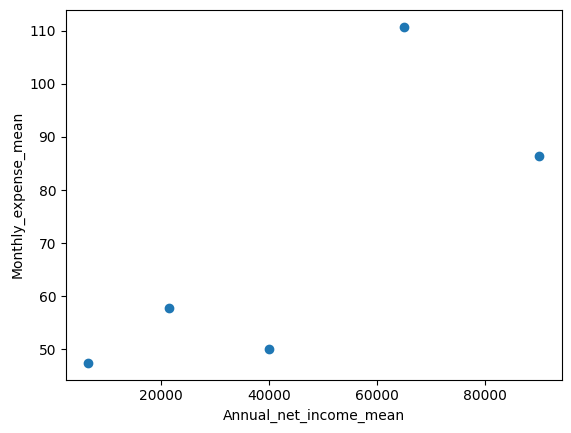

In [ ]:
x = Salary_corr['Annual_net_income_mean']
y = Salary_corr['Monthly_expense_mean']

plt.scatter(x, y)

plt.xlabel('Annual_net_income_mean')
plt.ylabel('Monthly_expense_mean')

plt.show()

Create correlation matrix with all numerical values

In [ ]:
df.head()

,Gender,Age,Status,Children,Employment_Status,Annual_net_income,Internet_hours,Platforms,Influencers_follow,Influencer_purchase,...,Purchase_frequency_year,Online_Influenced_purchase,Buying_target,Buying_sale_days,Annual_net_income_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean,Average_ticket
0,Female,34-50,Married,Yes,Employed full time,"50,000-80,000",3-4,Facebook,No,Yes,...,12,50-75%,Myself and family,Yes,65000,3.5,42.0,100,62.5,100.0
1,Female,18-26,Single,No,Employed part time,"30,000-50,000",3-4,"Instagram, TikTok, Youtube,",Yes,No,...,6,1-25 %,Myself,No,40000,3.5,22.0,25,13.0,50.0
2,Female,34-50,Married,Yes,Employed part time,"50,000-80,000",5-6,Facebook,Yes,No,...,2,25-50%,Myself and family,Yes,65000,5.5,42.0,100,37.5,600.0
3,Female,18-26,Single,No,Student,"0-13,000",7-8,All of the above,Yes,No,...,4,1-25 %,Myself,Yes,6500,7.5,22.0,25,13.0,75.0
4,Male,27-34,In a relationship,No,Employed full time,"50,000-80,000",3-4,Youtube,No,No,...,12,25-50%,Myself,Yes,65000,3.5,30.5,100,37.5,100.0


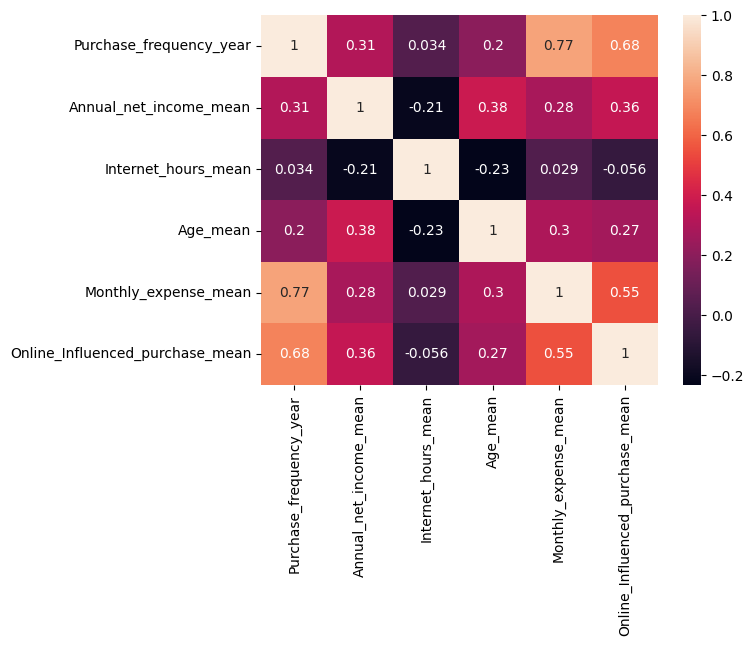

In [ ]:
corr_matrix = df[['Purchase_frequency_year','Annual_net_income_mean','Internet_hours_mean','Age_mean','Monthly_expense_mean','Online_Influenced_purchase_mean']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
df['Average_ticket'].describe()

count     60.0
mean       inf
std        NaN
min       25.0
25%       75.0
50%      100.0
75%      150.0
max        inf
Name: Average_ticket, dtype: float64

In [ ]:
df.head()

,Gender,Age,Status,Children,Employment_Status,Annual_net_income,Internet_hours,Platforms,Influencers_follow,Influencer_purchase,...,Purchase_frequency_year,Online_Influenced_purchase,Buying_target,Buying_sale_days,Annual_net_income_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean,Average_ticket
0,Female,34-50,Married,Yes,Employed full time,"50,000-80,000",3-4,Facebook,No,Yes,...,12,50-75%,Myself and family,Yes,65000,3.5,42.0,100,62.5,100.0
1,Female,18-26,Single,No,Employed part time,"30,000-50,000",3-4,"Instagram, TikTok, Youtube,",Yes,No,...,6,1-25 %,Myself,No,40000,3.5,22.0,25,13.0,50.0
2,Female,34-50,Married,Yes,Employed part time,"50,000-80,000",5-6,Facebook,Yes,No,...,2,25-50%,Myself and family,Yes,65000,5.5,42.0,100,37.5,600.0
3,Female,18-26,Single,No,Student,"0-13,000",7-8,All of the above,Yes,No,...,4,1-25 %,Myself,Yes,6500,7.5,22.0,25,13.0,75.0
4,Male,27-34,In a relationship,No,Employed full time,"50,000-80,000",3-4,Youtube,No,No,...,12,25-50%,Myself,Yes,65000,3.5,30.5,100,37.5,100.0


In [ ]:
df['Average_ticket'] = df['Average_ticket'].replace([np.inf, -np.inf], 0)

In [ ]:
df

,Gender,Age,Status,Children,Employment_Status,Annual_net_income,Internet_hours,Platforms,Influencers_follow,Influencer_purchase,...,Purchase_frequency_year,Online_Influenced_purchase,Buying_target,Buying_sale_days,Annual_net_income_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean,Average_ticket
0,Female,34-50,Married,Yes,Employed full time,"50,000-80,000",3-4,Facebook,No,Yes,...,12,50-75%,Myself and family,Yes,65000,3.5,42.0,100,62.5,100.0
1,Female,18-26,Single,No,Employed part time,"30,000-50,000",3-4,"Instagram, TikTok, Youtube,",Yes,No,...,6,1-25 %,Myself,No,40000,3.5,22.0,25,13.0,50.0
2,Female,34-50,Married,Yes,Employed part time,"50,000-80,000",5-6,Facebook,Yes,No,...,2,25-50%,Myself and family,Yes,65000,5.5,42.0,100,37.5,600.0
3,Female,18-26,Single,No,Student,"0-13,000",7-8,All of the above,Yes,No,...,4,1-25 %,Myself,Yes,6500,7.5,22.0,25,13.0,75.0
4,Male,27-34,In a relationship,No,Employed full time,"50,000-80,000",3-4,Youtube,No,No,...,12,25-50%,Myself,Yes,65000,3.5,30.5,100,37.5,100.0
5,Male,27-34,Married,Yes,Employed full time,"80,000-100,000",1-2,Instagram,Yes,Yes,...,12,25-50%,Myself and family,No,90000,1.5,30.5,25,37.5,25.0
6,Female,18-26,In a relationship,No,Student,"0-13,000",3-4,Twitter,No,Yes,...,2,1-25 %,Myself,Yes,6500,3.5,22.0,25,13.0,150.0
7,Female,27-34,In a relationship,Yes,Self-employed,"13,000-30,000",3-4,Facebook,No,Yes,...,24,50-75%,Myself and family,Yes,21500,3.5,30.5,250,62.5,125.0
8,Male,34-50,In a relationship,Yes,Employed part time,"50,000-80,000",1-2,"Instagram, TikTok, Youtube,",Yes,No,...,4,25-50%,Myself,Yes,65000,1.5,42.0,25,37.5,75.0
9,Female,27-34,Married,Yes,Homemaker,"50,000-80,000",5-6,Facebook,Yes,Yes,...,24,50-75%,Myself,No,65000,5.5,30.5,100,62.5,50.0


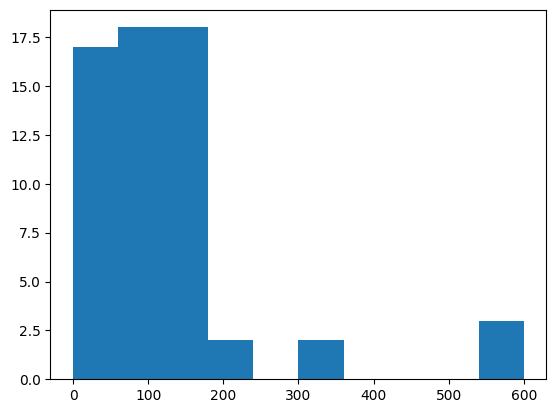

In [ ]:
plt.hist(df.Average_ticket)
plt.show()

In [ ]:
df['Average_ticket']

0     100.0
1      50.0
2     600.0
3      75.0
4     100.0
5      25.0
6     150.0
7     125.0
8      75.0
9      50.0
10     75.0
11     25.0
12    125.0
13    100.0
14     50.0
15    125.0
16    125.0
17    600.0
18     50.0
19     50.0
20     75.0
21    150.0
22    200.0
23     75.0
24    125.0
25     75.0
26     50.0
27     25.0
28    100.0
29     75.0
30    150.0
31    100.0
32    125.0
33    100.0
34     75.0
35    150.0
36    150.0
37    150.0
38      0.0
39    300.0
40    300.0
41      0.0
42    600.0
43    150.0
44    100.0
45      0.0
46     75.0
47    150.0
48    150.0
49    150.0
50    150.0
51    200.0
52     50.0
53     25.0
54     50.0
55    100.0
56     50.0
57     50.0
58    100.0
59    150.0
Name: Average_ticket, dtype: float64

In [ ]:
df.head()

,Gender,Age,Status,Children,Employment_Status,Annual_net_income,Internet_hours,Platforms,Influencers_follow,Influencer_purchase,...,Purchase_frequency_year,Online_Influenced_purchase,Buying_target,Buying_sale_days,Annual_net_income_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean,Average_ticket
0,Female,34-50,Married,Yes,Employed full time,"50,000-80,000",3-4,Facebook,No,Yes,...,12,50-75%,Myself and family,Yes,65000,3.5,42.0,100,62.5,100.0
1,Female,18-26,Single,No,Employed part time,"30,000-50,000",3-4,"Instagram, TikTok, Youtube,",Yes,No,...,6,1-25 %,Myself,No,40000,3.5,22.0,25,13.0,50.0
2,Female,34-50,Married,Yes,Employed part time,"50,000-80,000",5-6,Facebook,Yes,No,...,2,25-50%,Myself and family,Yes,65000,5.5,42.0,100,37.5,600.0
3,Female,18-26,Single,No,Student,"0-13,000",7-8,All of the above,Yes,No,...,4,1-25 %,Myself,Yes,6500,7.5,22.0,25,13.0,75.0
4,Male,27-34,In a relationship,No,Employed full time,"50,000-80,000",3-4,Youtube,No,No,...,12,25-50%,Myself,Yes,65000,3.5,30.5,100,37.5,100.0


Create dummies




In [ ]:
df_dummies = df

gender = pd.get_dummies(df_dummies['Gender'])
df_dummies = df_dummies.drop('Gender',axis = 1)
df_dummies = df_dummies.join(gender)

civil_status = pd.get_dummies(df_dummies['Status'])
df_dummies = df_dummies.drop('Status',axis = 1)
df_dummies = df_dummies.join(civil_status)

employment_status = pd.get_dummies(df_dummies['Employment_Status'])
df_dummies = df_dummies.drop('Employment_Status',axis = 1)
df_dummies = df_dummies.join(employment_status)

children = pd.get_dummies(df_dummies['Children'], prefix='Children')
df_dummies = df_dummies.drop('Children',axis = 1)
df_dummies = df_dummies.join(children)

online_preference = pd.get_dummies(df_dummies['Online_purchase_preference'], prefix='online_preference')
df_dummies = df_dummies.drop('Online_purchase_preference',axis = 1)
df_dummies = df_dummies.join(online_preference)

platform = pd.get_dummies(df_dummies['Platforms'])
df_dummies = df_dummies.drop('Platforms',axis = 1)
df_dummies = df_dummies.join(platform)

influencer_follow = pd.get_dummies(df_dummies['Influencers_follow'], prefix='Influencers_follow')
df_dummies = df_dummies.drop('Influencers_follow',axis = 1)
df_dummies = df_dummies.join(influencer_follow)

influencer_factor = pd.get_dummies(df_dummies['Influence_factors'], prefix='Influence_factors')
df_dummies = df_dummies.drop('Influence_factors',axis = 1)
df_dummies = df_dummies.join(influencer_factor)

influencer_purchase = pd.get_dummies(df_dummies['Influencer_purchase'], prefix='Influencer_purchase')
df_dummies = df_dummies.drop('Influencer_purchase',axis = 1)
df_dummies = df_dummies.join(influencer_purchase)

sale_days = pd.get_dummies(df_dummies['Buying_sale_days'], prefix='sale_days')
df_dummies = df_dummies.drop('Buying_sale_days',axis = 1)
df_dummies = df_dummies.join(sale_days)

buying_target = pd.get_dummies(df_dummies['Buying_target'])
df_dummies = df_dummies.drop('Buying_target',axis = 1)
df_dummies = df_dummies.join(buying_target)

pd.set_option('display.max_columns', None)

df_dummies = df_dummies.drop(['Age','Annual_net_income','Internet_hours','Monthly_expense','Online_Influenced_purchase'],axis = 1)
df_dummies

,Purchase_frequency_year,Annual_net_income_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean,Average_ticket,Female,Male,Male,In a relationship,Married,Single,Employed full time,Employed part time,Homemaker,Multiple part time employed,Self-employed,Student,Unemployed,Children_No,Children_Yes,online_preference_No,online_preference_Yes,All of the above,Facebook,"I don't use social media, sory",Instagram,"Instagram, TikTok, Youtube,",Linkedin,TikTok,Twitter,Youtube,linkedin,Influencers_follow_No,Influencers_follow_Yes,Influence_factors_All of the above,Influence_factors_Brand,Influence_factors_I like it,Influence_factors_Price (Promotions),Influence_factors_Price (Promotions)\nAll of the above,Influence_factors_Price (Promotions)\nBrand,Influence_factors_Price (Promotions)\nValue,"Influence_factors_Price (Promotions)\nValue\nethics, sustainability","Influence_factors_Sustainability, social equality throughout the whole supply chain",Influence_factors_Value,Influencer_purchase_No,Influencer_purchase_Yes,sale_days_No,sale_days_Yes,I don't buy my clothes online,My family,Myself,Myself and family
0,12,65000,3.5,42.0,100,62.5,100.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,6,40000,3.5,22.0,25,13.0,50.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
2,2,65000,5.5,42.0,100,37.5,600.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
3,4,6500,7.5,22.0,25,13.0,75.0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,12,65000,3.5,30.5,100,37.5,100.0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
5,12,90000,1.5,30.5,25,37.5,25.0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
6,2,6500,3.5,22.0,25,13.0,150.0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
7,24,21500,3.5,30.5,250,62.5,125.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
8,4,65000,1.5,42.0,25,37.5,75.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
9,24,65000,5.5,30.5,100,62.5,50.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0


In [ ]:
df_dummies.head()

,Purchase_frequency_year,Annual_net_income_mean,Internet_hours_mean,Age_mean,Monthly_expense_mean,Online_Influenced_purchase_mean,Average_ticket,Female,Male,Male,In a relationship,Married,Single,Employed full time,Employed part time,Homemaker,Multiple part time employed,Self-employed,Student,Unemployed,Children_No,Children_Yes,online_preference_No,online_preference_Yes,All of the above,Facebook,"I don't use social media, sory",Instagram,"Instagram, TikTok, Youtube,",Linkedin,TikTok,Twitter,Youtube,linkedin,Influencers_follow_No,Influencers_follow_Yes,Influence_factors_All of the above,Influence_factors_Brand,Influence_factors_I like it,Influence_factors_Price (Promotions),Influence_factors_Price (Promotions)\nAll of the above,Influence_factors_Price (Promotions)\nBrand,Influence_factors_Price (Promotions)\nValue,"Influence_factors_Price (Promotions)\nValue\nethics, sustainability","Influence_factors_Sustainability, social equality throughout the whole supply chain",Influence_factors_Value,Influencer_purchase_No,Influencer_purchase_Yes,sale_days_No,sale_days_Yes,I don't buy my clothes online,My family,Myself,Myself and family
0,12,65000,3.5,42.0,100,62.5,100.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,6,40000,3.5,22.0,25,13.0,50.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
2,2,65000,5.5,42.0,100,37.5,600.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
3,4,6500,7.5,22.0,25,13.0,75.0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,12,65000,3.5,30.5,100,37.5,100.0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
# First ticket 100-300
first_ticket = df_dummies[(df_dummies['Average_ticket']>=100) & (df_dummies['Average_ticket']<=300)]

# Second ticket above 300
second_ticket = df_dummies[(df_dummies['Average_ticket']>300)]


In [ ]:
sum = {}
mean = {}
column_list = ['Male','Female','In a relationship','Married','Single','Employed full time','Employed part time','Children_No','Children_Yes','Homemaker','Multiple part time employed','Self-employed','Student','Unemployed','online_preference_No','online_preference_Yes','Facebook','TikTok','Instagram','All of the above',"I don't use social media, sory",'Linkedin','Youtube','Influencers_follow_Yes','Influencers_follow_No','Influence_factors_Brand','Influence_factors_Price (Promotions)\nBrand','Influence_factors_Price (Promotions)\nValue\nethics, sustainability','Influence_factors_Sustainability, social equality throughout the whole supply chain','Influence_factors_Price (Promotions)\nValue\nethics, sustainability','Influence_factors_Price (Promotions)\nAll of the above','Influence_factors_Price (Promotions)\nValue','Influence_factors_Value','Influence_factors_Price (Promotions)','Influencer_purchase_No','Influencer_purchase_Yes','sale_days_No','sale_days_Yes',"I don't buy my clothes online","My family",'Myself',"Myself and family"]
column_list_2 = ['Purchase_frequency_year','Annual_net_income_mean','Internet_hours_mean','Age_mean','Monthly_expense_mean','Online_Influenced_purchase_mean','Average_ticket']
for column in column_list:
    a= first_ticket[column].sum()
    sum[column] = a

for column in column_list_2:
    a= first_ticket[column].mean()
    mean[column] = a

In [ ]:
sum_df = pd.DataFrame(sum.items())
sum_df = sum_df.rename(columns={0: 'Attribute', 1: 'count'})

sum_df

,Attribute,count
0,Male,10
1,Female,20
2,In a relationship,8
3,Married,18
4,Single,5
5,Employed full time,10
6,Employed part time,8
7,Children_No,16
8,Children_Yes,15
9,Homemaker,4


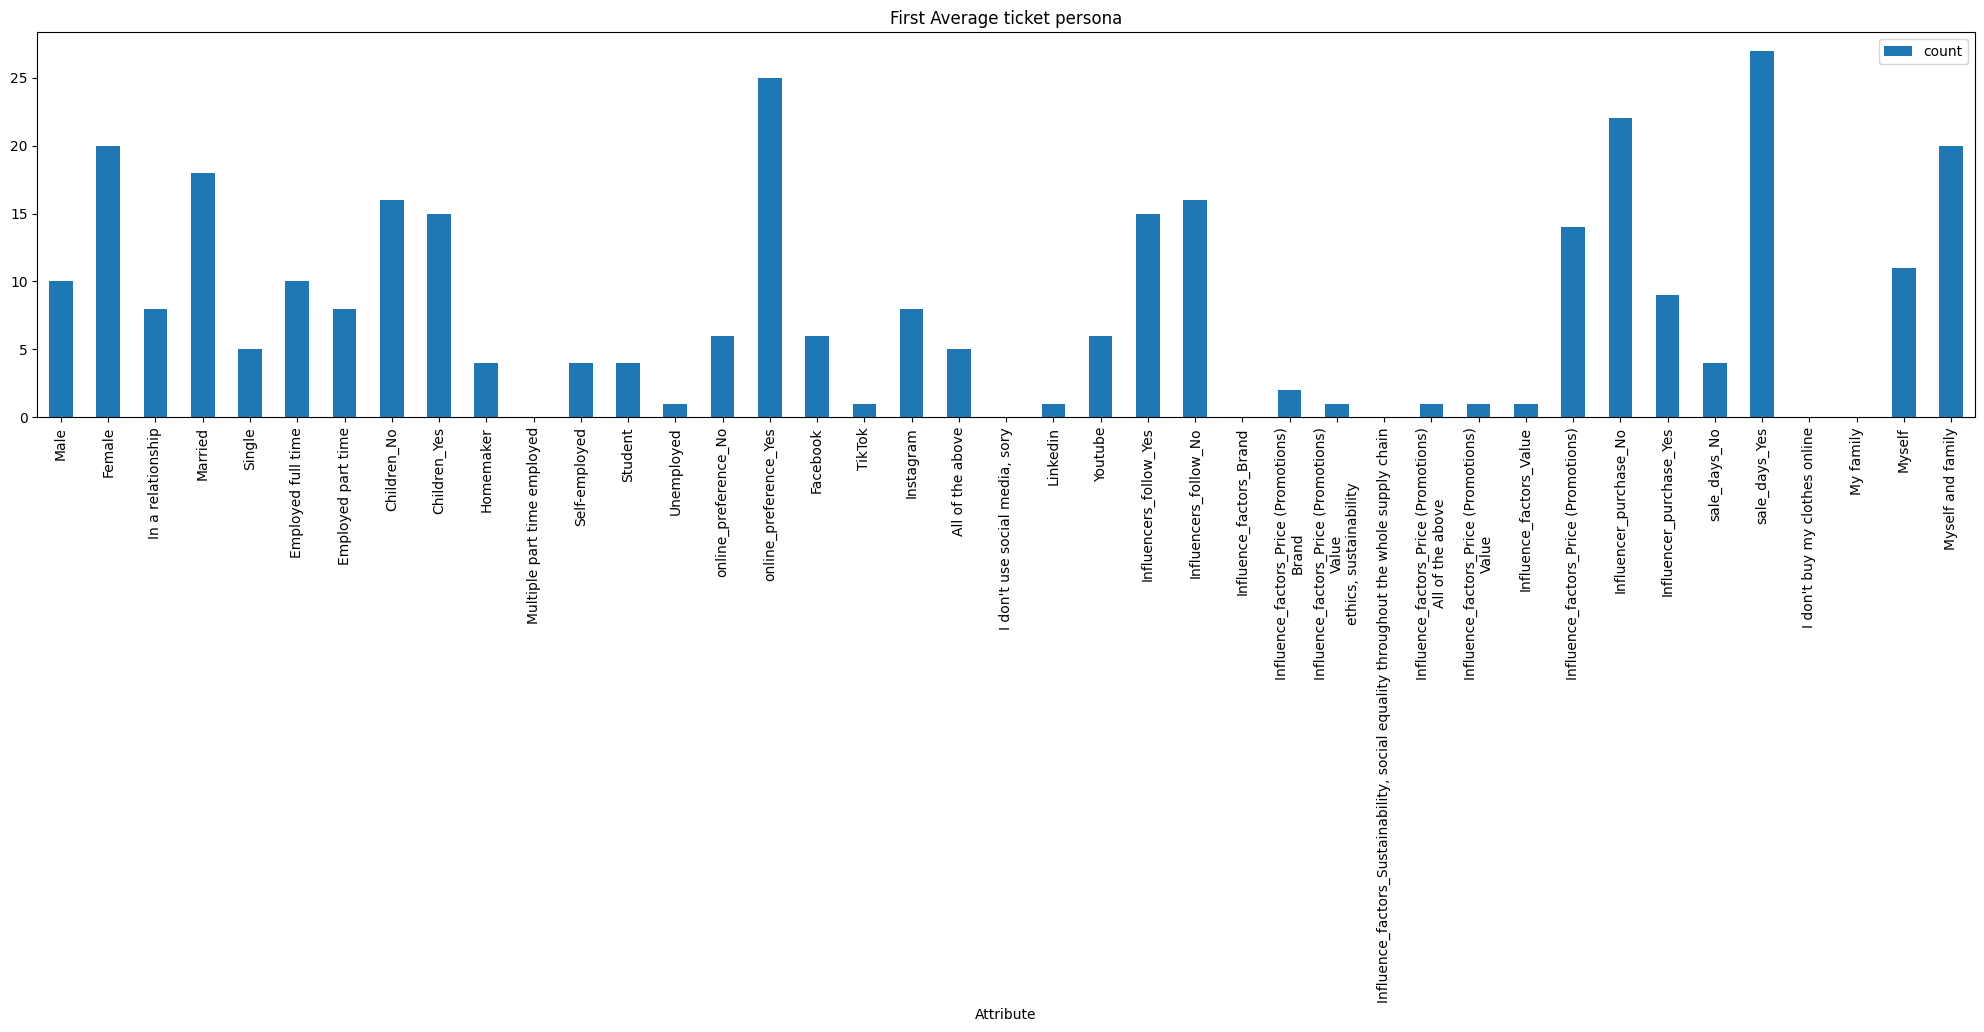

In [ ]:
plt.rcParams["figure.figsize"] = (25,5)

ax = sum_df.plot(x="Attribute", y="count", kind="bar", rot=90)

ax.set_title('First Average ticket persona')

plt.show()

In [ ]:
mean_df = pd.DataFrame(mean.items())
mean_df = mean_df.rename(columns={0: 'Attribute', 1: 'mean'})

mean_df

,Attribute,mean
0,Purchase_frequency_year,9.451613
1,Annual_net_income_mean,47354.838710
2,Internet_hours_mean,3.016129
3,Age_mean,33.580645
4,Monthly_expense_mean,97.580645
5,Online_Influenced_purchase_mean,39.274194
6,Average_ticket,143.548387


In [ ]:
sum = {}
mean = {}
column_list = ['Male','Female','In a relationship','Married','Single','Employed full time','Employed part time','Children_No','Children_Yes','Homemaker','Multiple part time employed','Self-employed','Student','Unemployed','online_preference_No','online_preference_Yes','Facebook','TikTok','Instagram','All of the above',"I don't use social media, sory",'Linkedin','Youtube','Influencers_follow_Yes','Influencers_follow_No','Influence_factors_Brand','Influence_factors_Price (Promotions)\nBrand','Influence_factors_Price (Promotions)\nValue\nethics, sustainability','Influence_factors_Sustainability, social equality throughout the whole supply chain','Influence_factors_Price (Promotions)\nValue\nethics, sustainability','Influence_factors_Price (Promotions)\nAll of the above','Influence_factors_Price (Promotions)\nValue','Influence_factors_Value','Influence_factors_Price (Promotions)','Influencer_purchase_No','Influencer_purchase_Yes','sale_days_No','sale_days_Yes',"I don't buy my clothes online","My family",'Myself',"Myself and family"]
column_list_2 = ['Purchase_frequency_year','Annual_net_income_mean','Internet_hours_mean','Age_mean','Monthly_expense_mean','Online_Influenced_purchase_mean','Average_ticket']
for column in column_list:
    a= second_ticket[column].sum()
    sum[column] = a

for column in column_list_2:
    a= second_ticket[column].mean()
    mean[column] = a

In [ ]:
sum_df = pd.DataFrame(sum.items())
sum_df = sum_df.rename(columns={0: 'Attribute', 1: 'count'})

sum_df

,Attribute,count
0,Male,1
1,Female,2
2,In a relationship,2
3,Married,1
4,Single,0
5,Employed full time,2
6,Employed part time,1
7,Children_No,1
8,Children_Yes,2
9,Homemaker,0


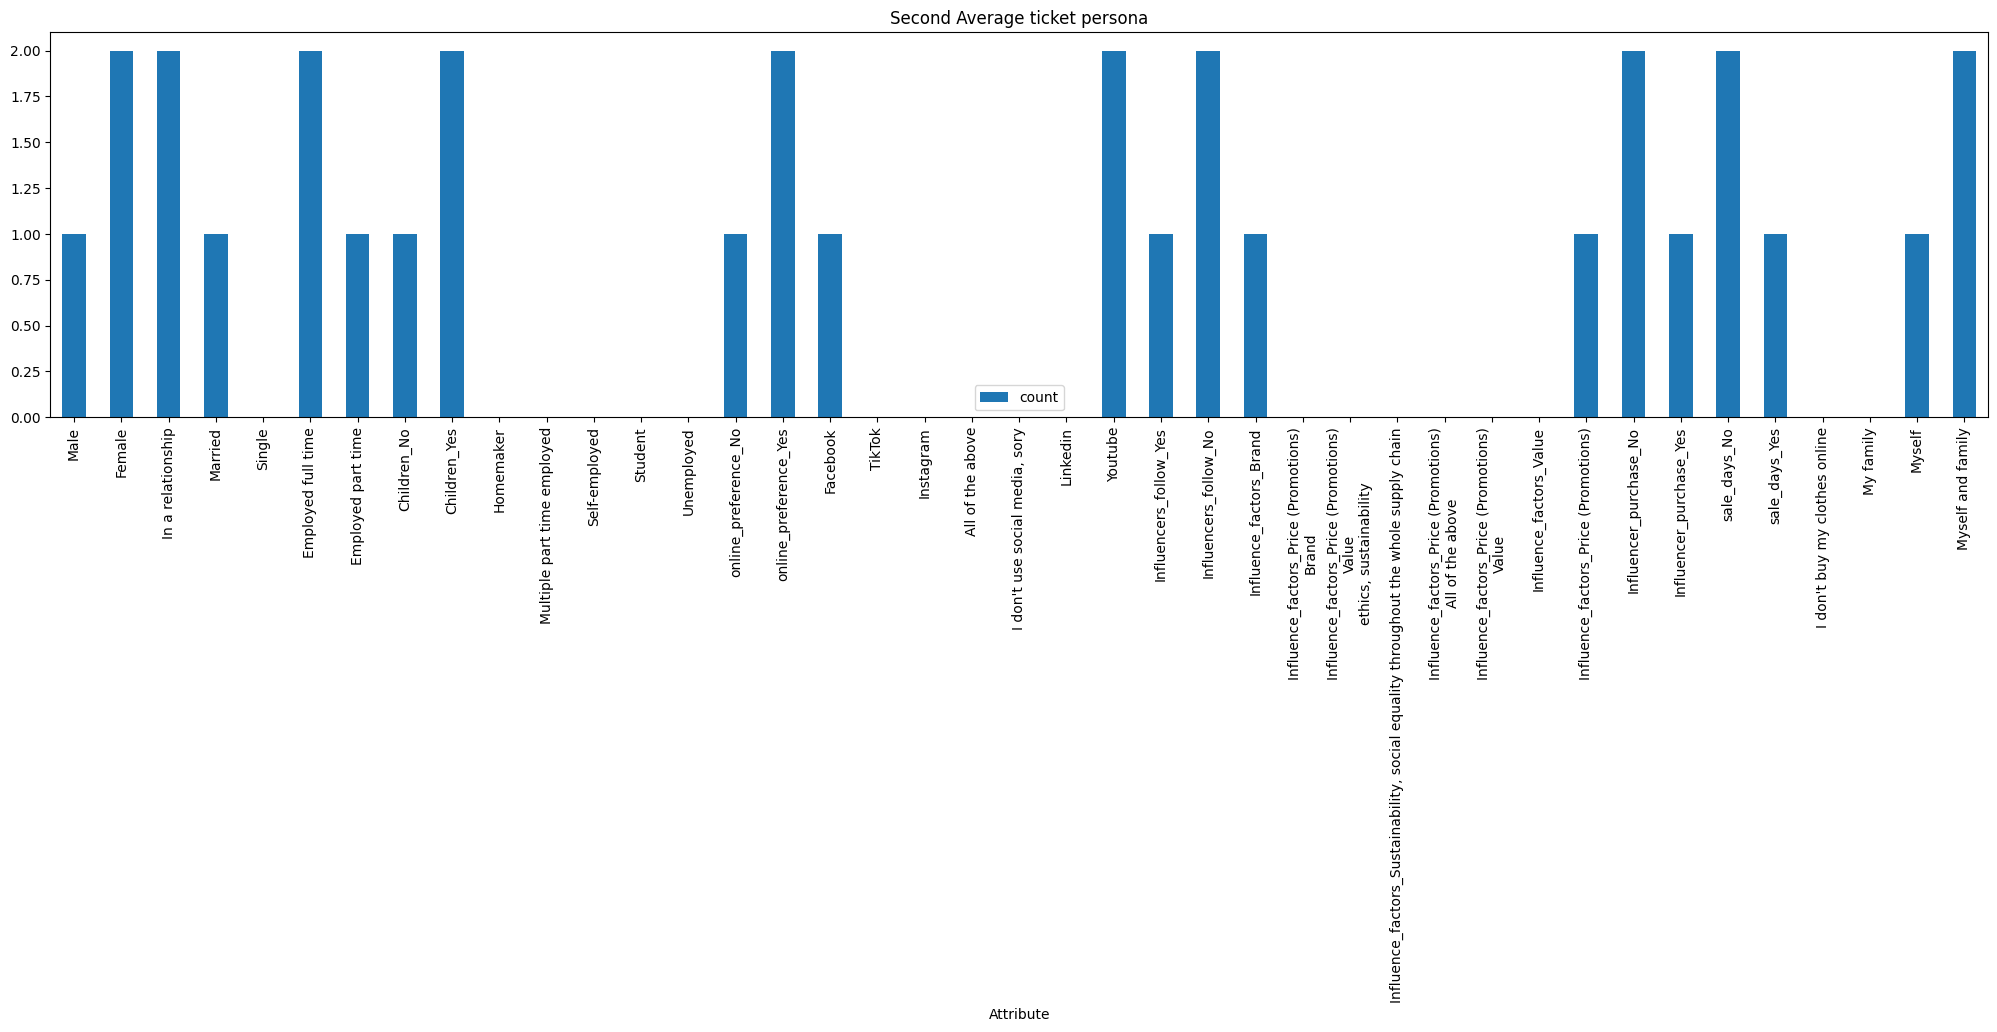

In [ ]:
plt.rcParams["figure.figsize"] = (25,5)

ax = sum_df.plot(x="Attribute", y="count", kind="bar", rot=90)

ax.set_title('Second Average ticket persona')

plt.show()

In [ ]:
mean_df = pd.DataFrame(mean.items())
mean_df = mean_df.rename(columns={0: 'Attribute', 1: 'mean'})

mean_df

,Attribute,mean
0,Purchase_frequency_year,2.000000
1,Annual_net_income_mean,73333.333333
2,Internet_hours_mean,4.166667
3,Age_mean,38.166667
4,Monthly_expense_mean,100.000000
5,Online_Influenced_purchase_mean,21.166667
6,Average_ticket,600.000000
